<a href="https://colab.research.google.com/github/Lailamh/DSRP1/blob/main/Data_Science_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression


In [12]:
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"
office_df = pd.read_csv(url)

In [ ]:
office_df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

In [ ]:
office_df[office_df['text'].isnull()]

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
149,150,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,NaN,[Laughing],7.6,3706,2005-03-24,NaN,0.138675,0.0
345,346,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Jim,NaN,[/b],8.3,3566,2005-03-29,NaN,0.000000,0.0
1215,1216,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Kevin,NaN,[nods],7.8,2852,2005-04-26,NaN,-0.166667,0.0
1247,1248,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Toby,NaN,[looks resigned],7.8,2852,2005-04-26,NaN,0.000000,0.0
1288,1289,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Pam,NaN,[smiles],7.8,2852,2005-04-26,NaN,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54679,54680,9,24,Finale,Ken Kwapis,Greg Daniels,Bill Hader,NaN,[pulling multiple tissues out],9.7,7934,2013-05-16,NaN,0.326599,0.0
54761,54762,9,24,Finale,Ken Kwapis,Greg Daniels,Guy,NaN,[fake cries],9.7,7934,2013-05-16,NaN,0.353553,0.0
54777,54778,9,24,Finale,Ken Kwapis,Greg Daniels,Rachel,NaN,[speaks in a special language],9.7,7934,2013-05-16,NaN,0.200446,0.0
54830,54831,9,24,Finale,Ken Kwapis,Greg Daniels,All,NaN,[screams],9.7,7934,2013-05-16,NaN,-0.121854,0.0


In [ ]:
#removing null values for 'text'
office_df = office_df.dropna(axis = 0, how='any', subset = ['text'])
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54753 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    54753 non-null  int64  
 1   season                   54753 non-null  int64  
 2   episode                  54753 non-null  int64  
 3   episode_name             54753 non-null  object 
 4   director                 54753 non-null  object 
 5   writer                   54753 non-null  object 
 6   character                54753 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         54753 non-null  object 
 9   imdb_rating              54753 non-null  float64
 10  total_votes              54753 non-null  int64  
 11  air_date                 54753 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         54753 non-null  float64
 14  syuzhet_score            54

In [ ]:
#imputing null values for 'setimentAnalysis_score'
office_df[office_df['sentimentAnalysis_score'].isnull()]
office_df['sentimentAnalysis_score'].unique()

array([ 0.28571429,  0.        ,  0.42857143,  0.4       ,  0.09756098,
        0.06896552,  0.33333333,  0.125     ,         nan,  0.09090909,
        0.22222222,  0.2       ,  0.5       ,  0.66666667, -1.        ,
        0.25      ,  0.08333333, -0.16666667, -0.33333333,  1.        ,
       -0.125     , -0.19230769, -0.25      , -0.11111111, -0.66666667,
        0.04347826, -0.4       ,  0.36363636,  0.16666667,  0.1875    ,
        0.18518519,  0.1       , -0.5       , -0.05      ,  0.14285714,
       -0.2       ,  0.06666667, -0.22222222,  0.07692308,  0.6       ,
        0.41666667, -0.04761905,  0.05      ,  0.07142857, -0.03846154,
        0.13513514,  0.3       ,  0.75      ,  0.04545455,  0.15      ,
        0.375     ,  0.04      , -0.1       ,  0.13333333,  0.17647059,
        0.11111111,  0.09433962,  0.71428571,  0.08571429,  0.03846154,
        0.18918919,  0.11764706,  0.06122449,  0.05882353,  0.23076923,
        0.10526316,  0.44444444,  0.13636364,  0.30769231,  0.18

In [ ]:
#filling in null values for 'sentimentAnalysis_score' with numbers provided from .unique()
office_df.loc[office_df['sentimentAnalysis_score'].isnull(), 'sentimentAnalysis_score'] = 'non-null value'
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  55130 non-null  object 
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

# **Notes to self:**

**imdb_rating**: The IMDb user rating for the episode, on a 1–10 scale.

**total_votes**: The number of IMDb users who voted on the episode's rating.

**sentimentAnalysis_score**: Sentiment score from the `sentimentAnalysis` package. Values typically range from -1 (very negative) to 1 (very positive), with 0 representing neutral sentiment.

**sentimentr_score**: Sentiment score from the `sentimentr` package, which accounts for context and valence shifters (e.g., negations). Scores generally fall between -1 and 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values near 0 are neutral.

**syuzhet_score**: Sentiment score from the `syuzhet` package, derived from a dictionary-based approach. Unlike the others, these scores can extend beyond the -1 to 1 range and are unbounded, but they still follow the same directional logic: negative values indicate negative sentiment, positive values indicate positive sentiment.

In [ ]:
office_df.describe()

,index,season,episode,imdb_rating,total_votes,sentimentr_score,syuzhet_score
count,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000
mean,27555.824101,5.536957,12.554983,8.301868,2173.774259,0.060453,0.241815
std,15911.845049,2.342346,7.294605,0.549570,892.822125,0.263524,0.709950
min,1.000000,1.000000,1.000000,6.700000,1393.000000,-2.236068,-5.000000
25%,13771.000000,3.000000,6.000000,7.900000,1633.000000,0.000000,0.000000
50%,27568.000000,6.000000,12.000000,8.300000,1962.000000,0.000000,0.000000
75%,41348.000000,7.000000,19.000000,8.700000,2403.000000,0.125000,0.600000
max,55130.000000,9.000000,28.000000,9.700000,7934.000000,2.645751,7.750000


In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54753 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    54753 non-null  int64  
 1   season                   54753 non-null  int64  
 2   episode                  54753 non-null  int64  
 3   episode_name             54753 non-null  object 
 4   director                 54753 non-null  object 
 5   writer                   54753 non-null  object 
 6   character                54753 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         54753 non-null  object 
 9   imdb_rating              54753 non-null  float64
 10  total_votes              54753 non-null  int64  
 11  air_date                 54753 non-null  object 
 12  sentimentAnalysis_score  54753 non-null  object 
 13  sentimentr_score         54753 non-null  float64
 14  syuzhet_score            54


# **Possible research questions!**

1. Are certain characters associated more with positive/negative sentiment?

2. What season was the best, and what do you think made it so great?

3. Which episodes have the highest/lowest average sentiment analysis scores?

4. Is there a correlation between an episode's length and it's ratings?

5. Can sentiment analysis predict an episode's IMDb score?

In [20]:
office_df.head(1000)

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,5,Basketball,Greg Daniels,Greg Daniels,Dwight,Yes!,Yes!,8.4,3179,2005-04-19,0.000000,0.141421,0.80
996,997,1,5,Basketball,Greg Daniels,Greg Daniels,Michael,Sorry Phyllis.,Sorry Phyllis.,8.4,3179,2005-04-19,-0.500000,0.000000,-0.50
997,998,1,5,Basketball,Greg Daniels,Greg Daniels,Dwight,Can I be team captain?,Can I be team captain?,8.4,3179,2005-04-19,0.000000,0.204124,0.00
998,999,1,5,Basketball,Greg Daniels,Greg Daniels,Michael,"No, I'm team captain.","No, I'm team captain.",8.4,3179,2005-04-19,0.000000,0.500000,0.00


## Final research question: Are certain associated more with negative or positive sentiment in Episodes 1 and 2, and how does their associated sentiment develop over time?



Do the characters in episode 1 and 2 have a negative/positive impact on the Episode's Sentiment Score, and what could this mean for future episodes?

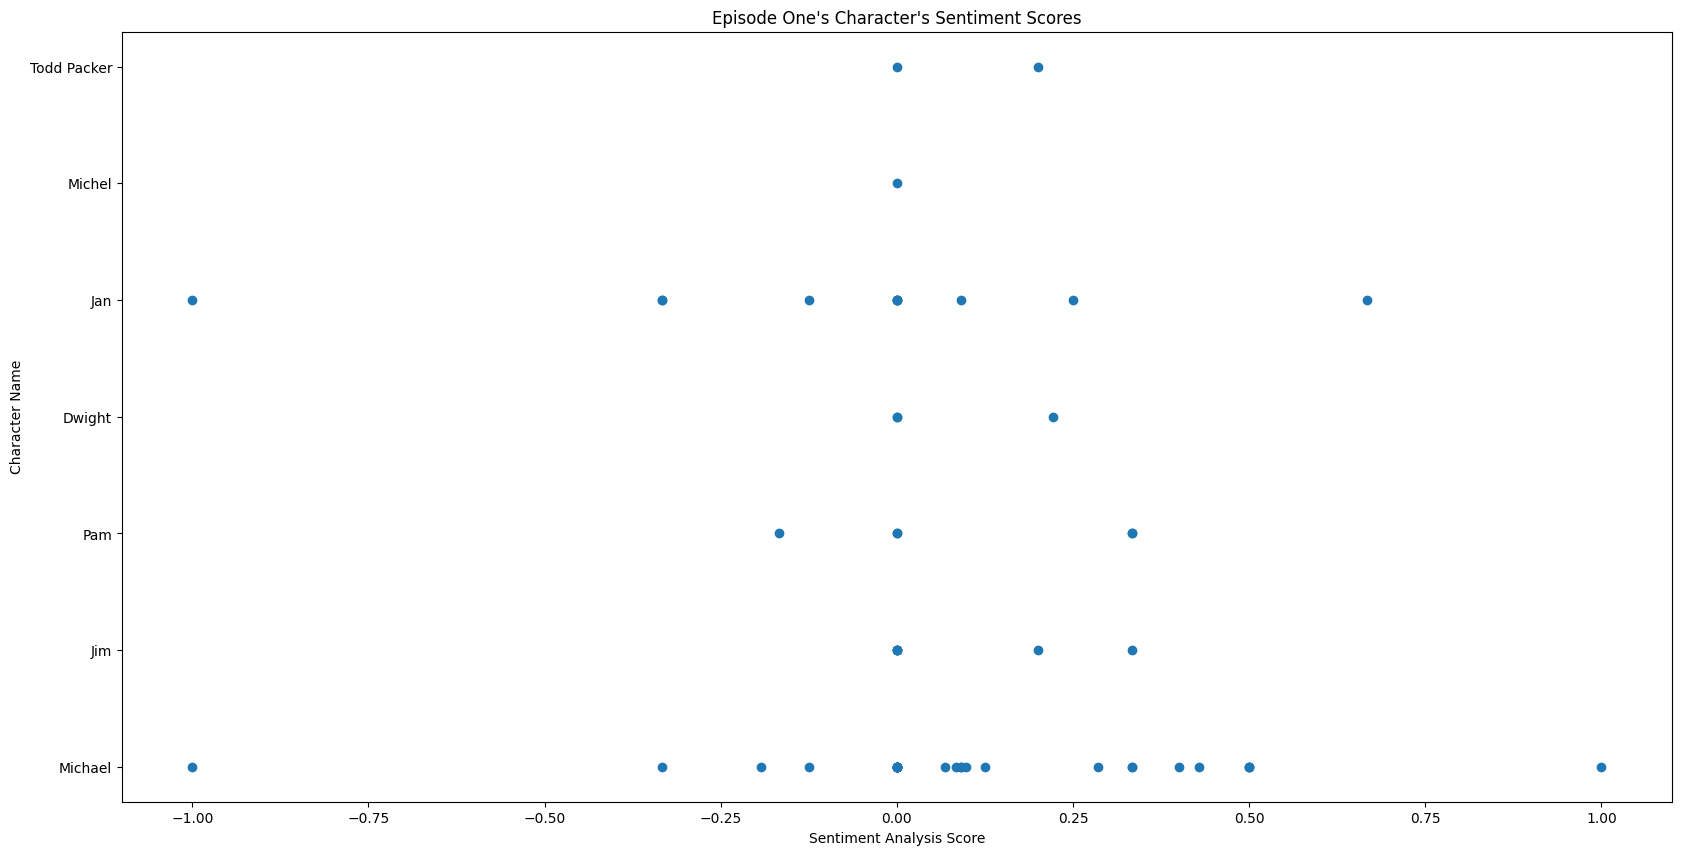

In [ ]:
#making a scatterplot for episode 1

episode1_characters = office_df['character'].iloc[:60]
episode1_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[:60]
plt.figure(figsize=(20, 10))
plt.scatter(episode1_sentiment_scores, episode1_characters)
plt.title("Episode One's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()
#THIS iS FROM EPISODE 1 CALLED: THE PILOT!!! The next graph (below this one) is going to be from EPISODE 2 CALLED: DIVERSITY DAY!!!

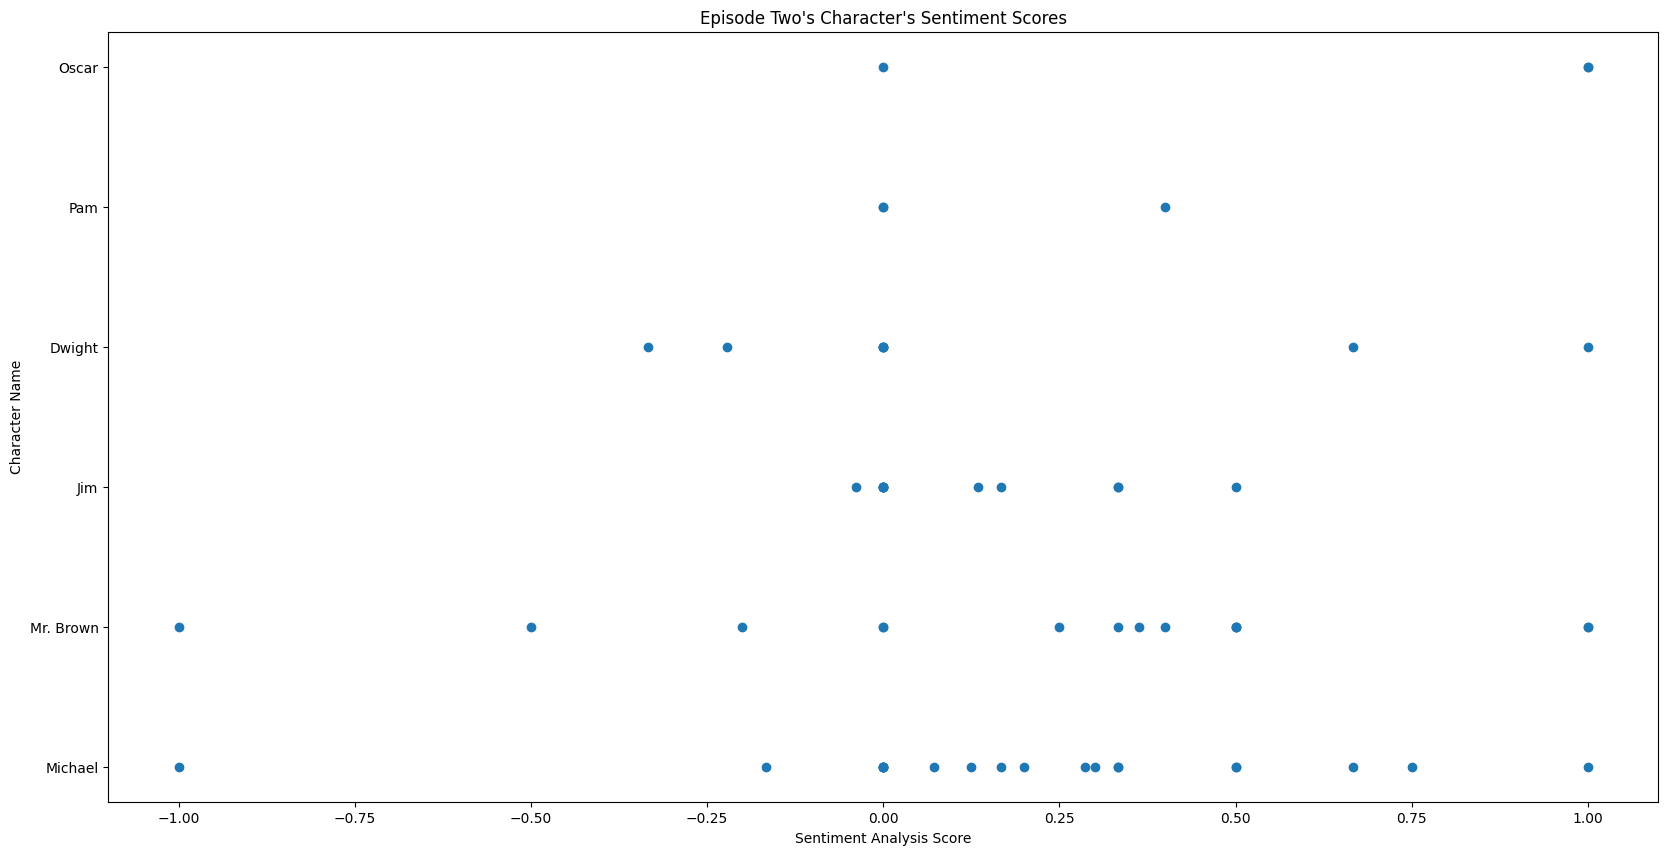

In [ ]:
#office_df.head(230)

#EPISODE 2: DIVERSITY DAY, STARTING LINE 229

episode2_characters = office_df['character'].iloc[229:290]
episode2_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[229:290]
plt.figure(figsize=(20, 10))
plt.scatter(episode2_sentiment_scores, episode2_characters)
plt.title("Episode Two's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()

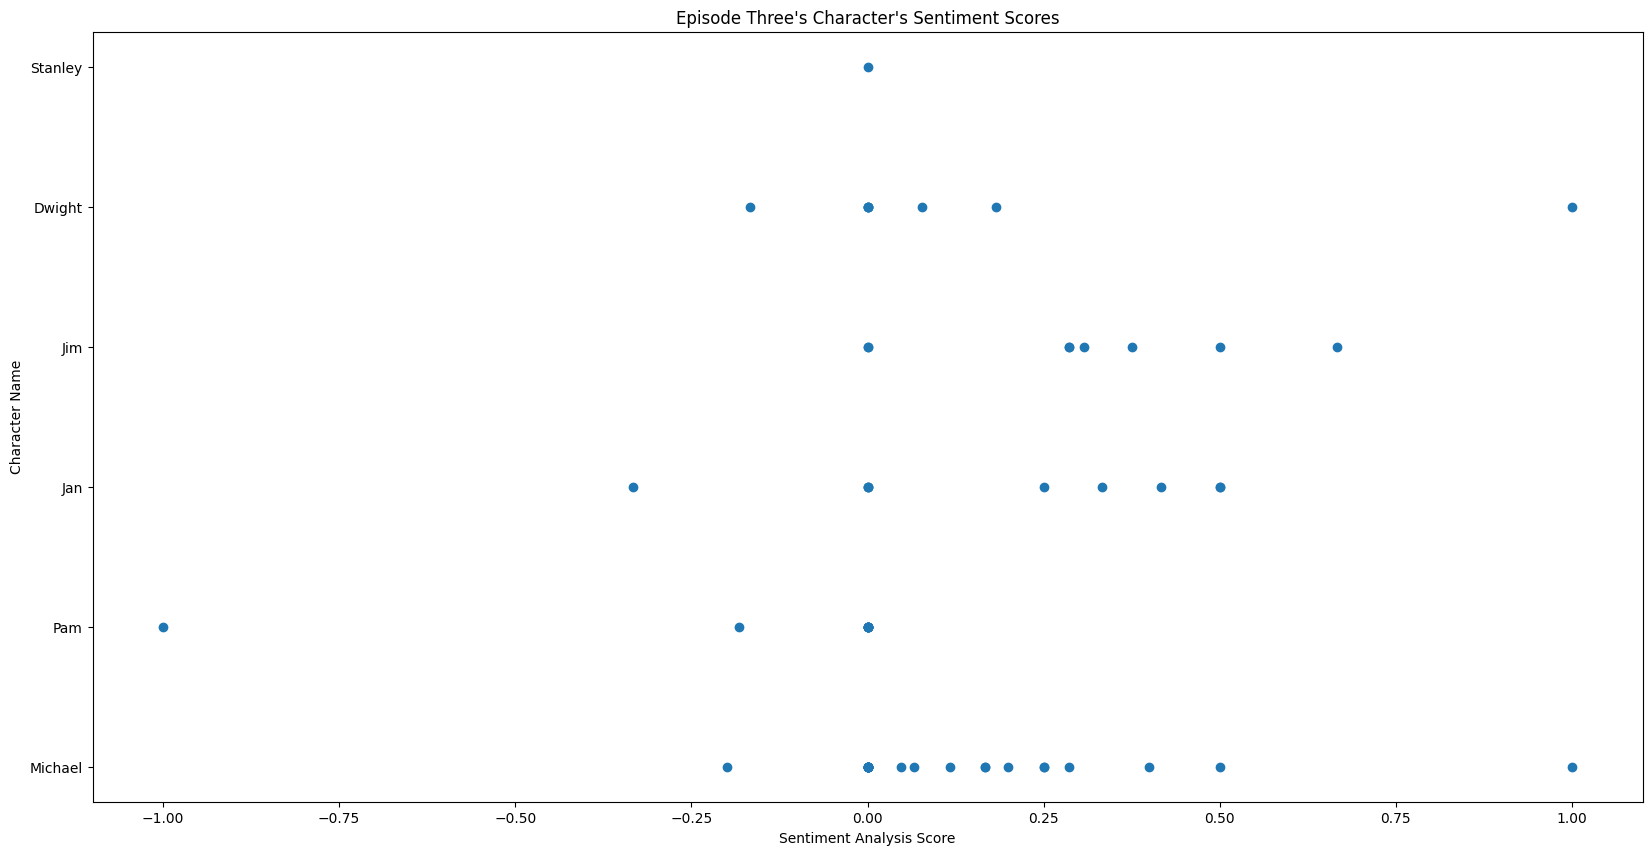

In [ ]:
#office_df.head(433)

#EPISODE #3: HEALTH CARE, STARTING LINE 432
episode3_characters = office_df['character'].iloc[432:493]
episode3_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[432:493]
plt.figure(figsize=(20, 10))
plt.scatter(episode3_sentiment_scores, episode3_characters)
plt.title("Episode Three's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()


Now I'll work on the ***lightning talk slide***.
Here is a picture of the slide below. It's one slide per graph, so there's three slides. But the format is the same so it looks like one slide just with the image in the center changing!


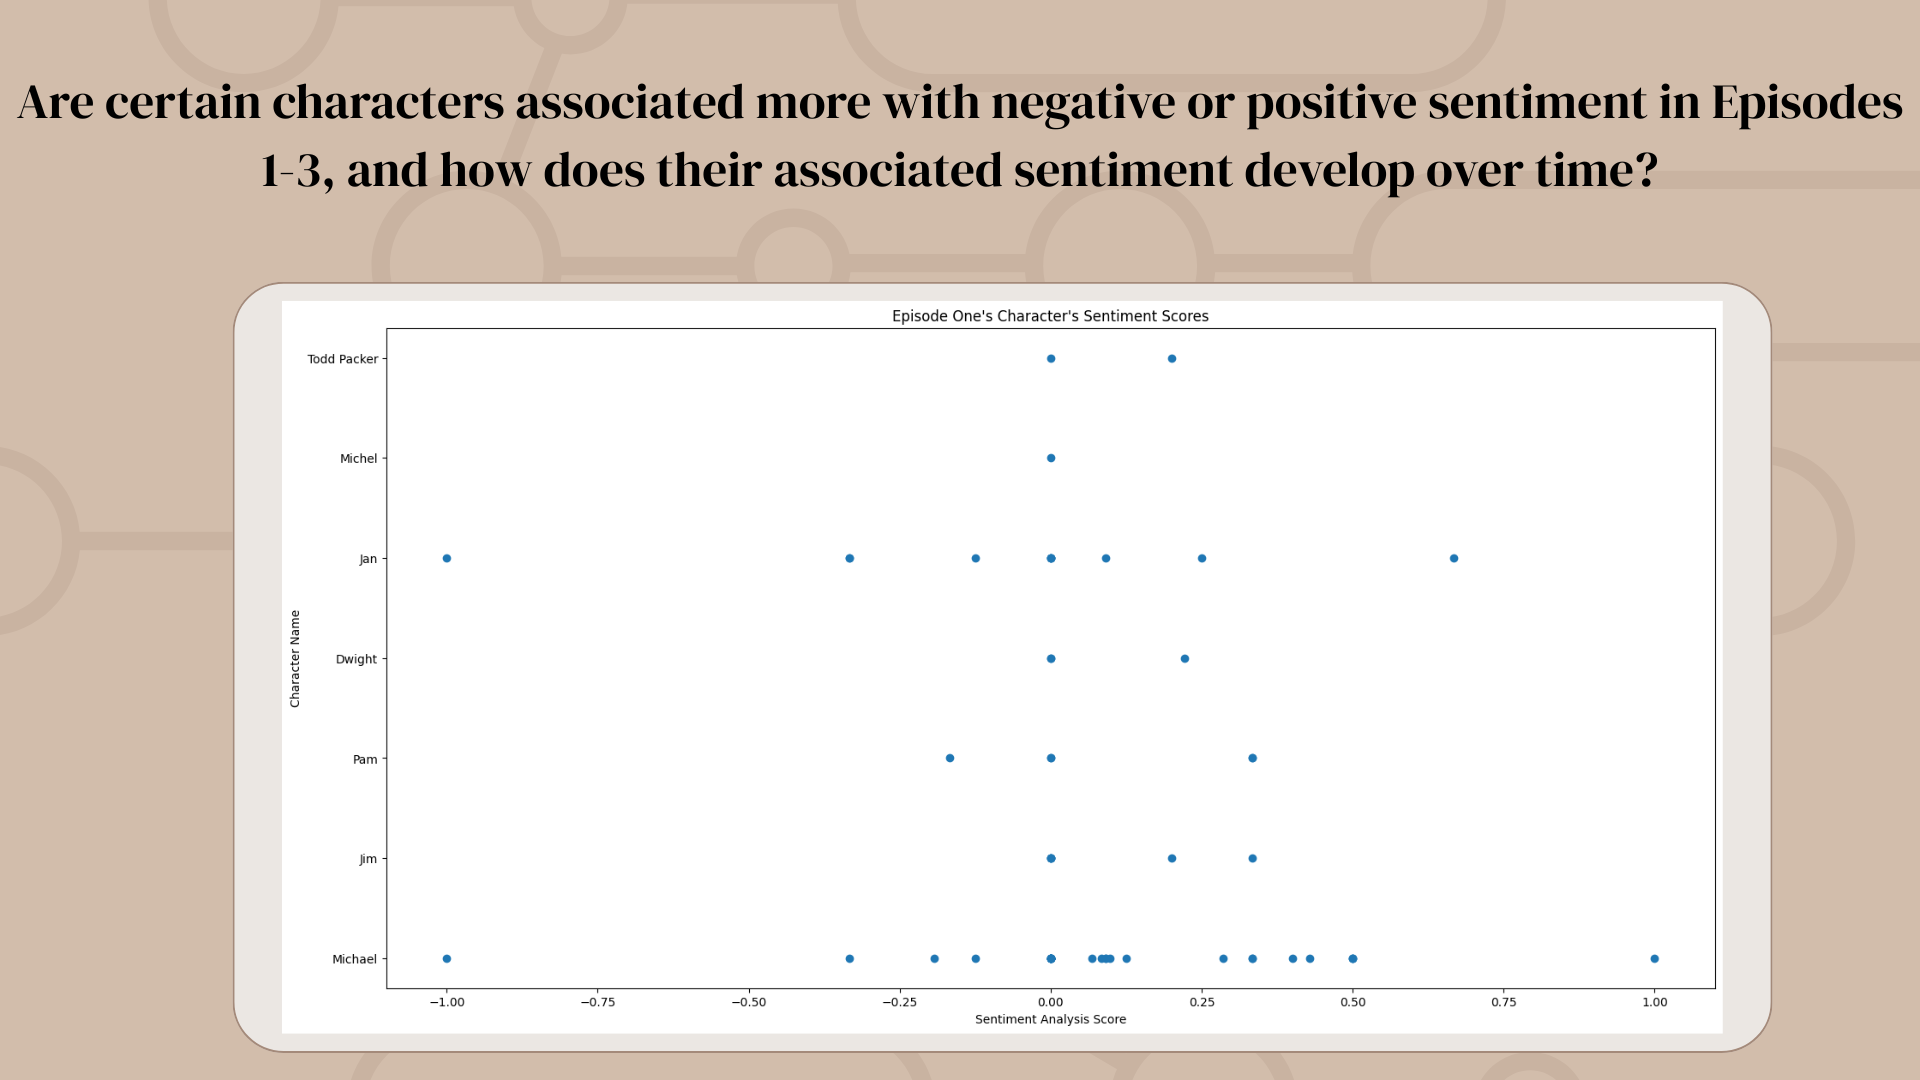

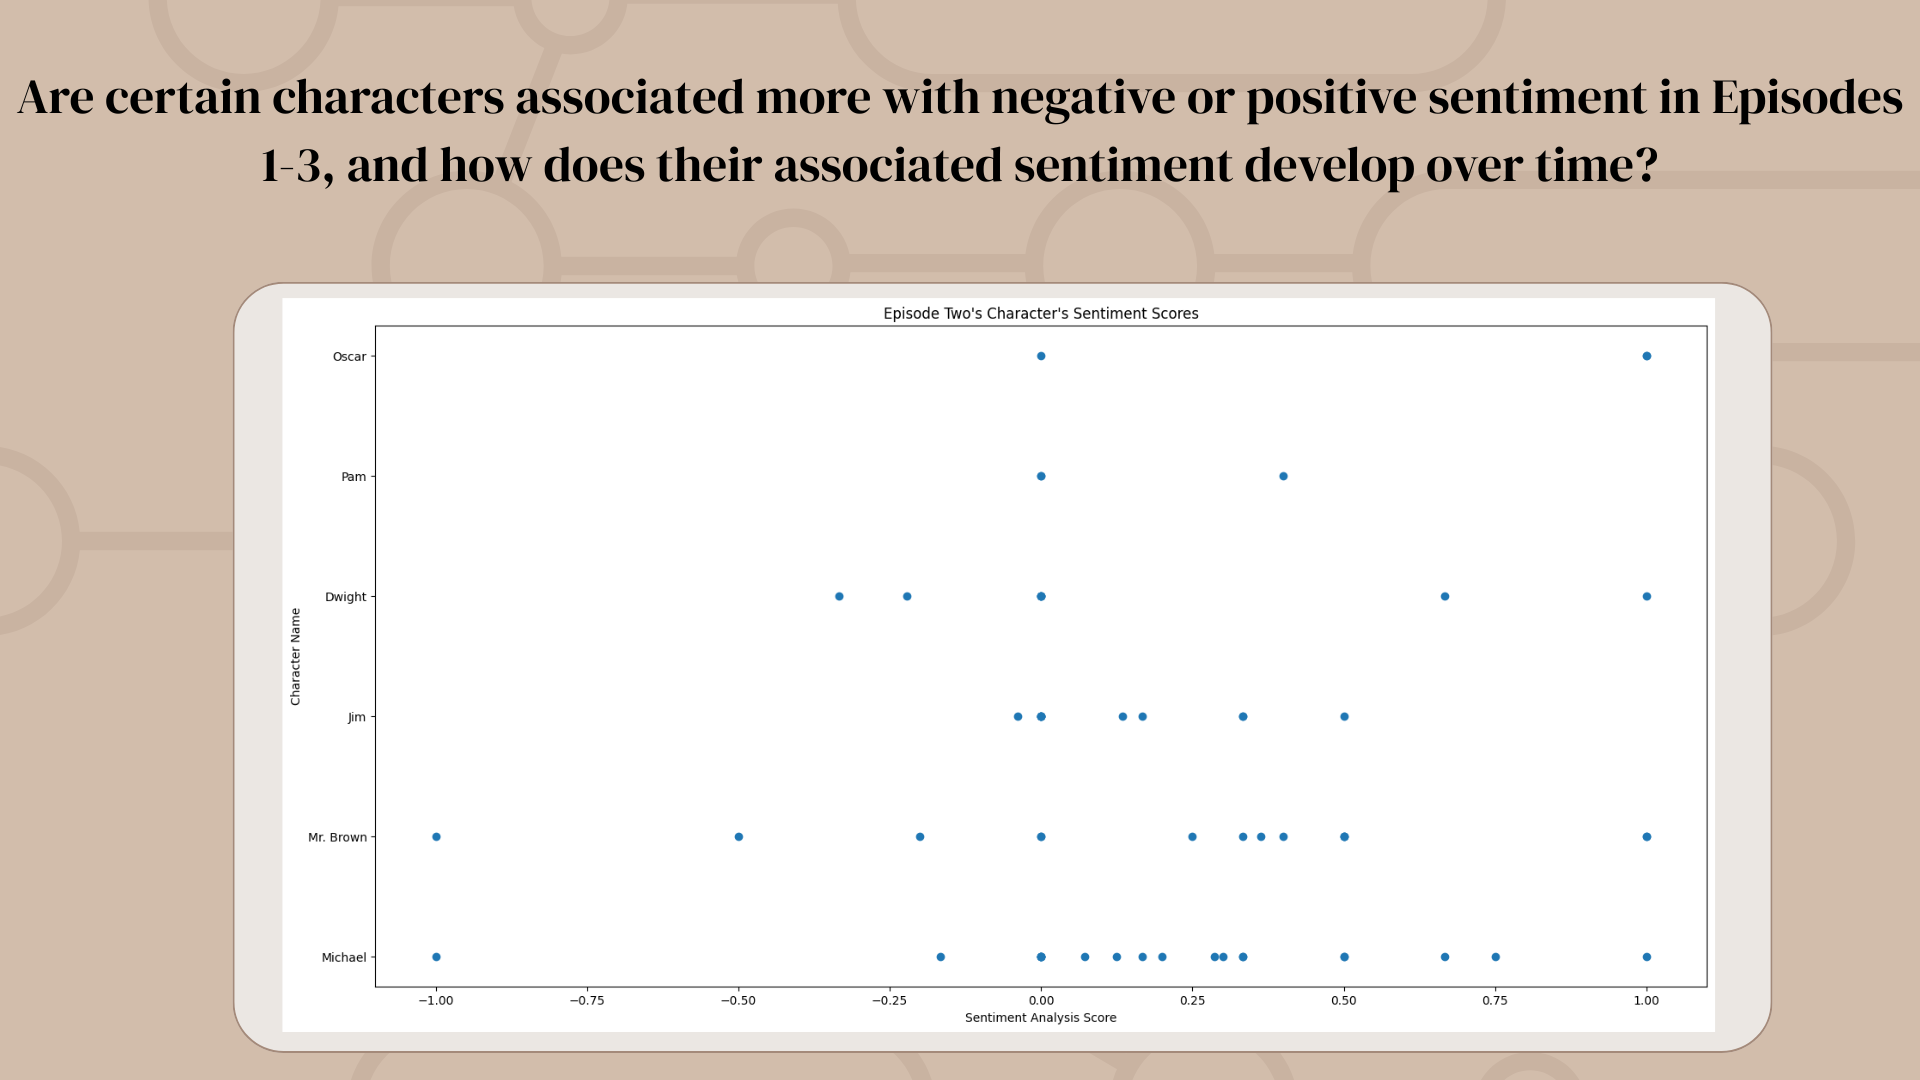

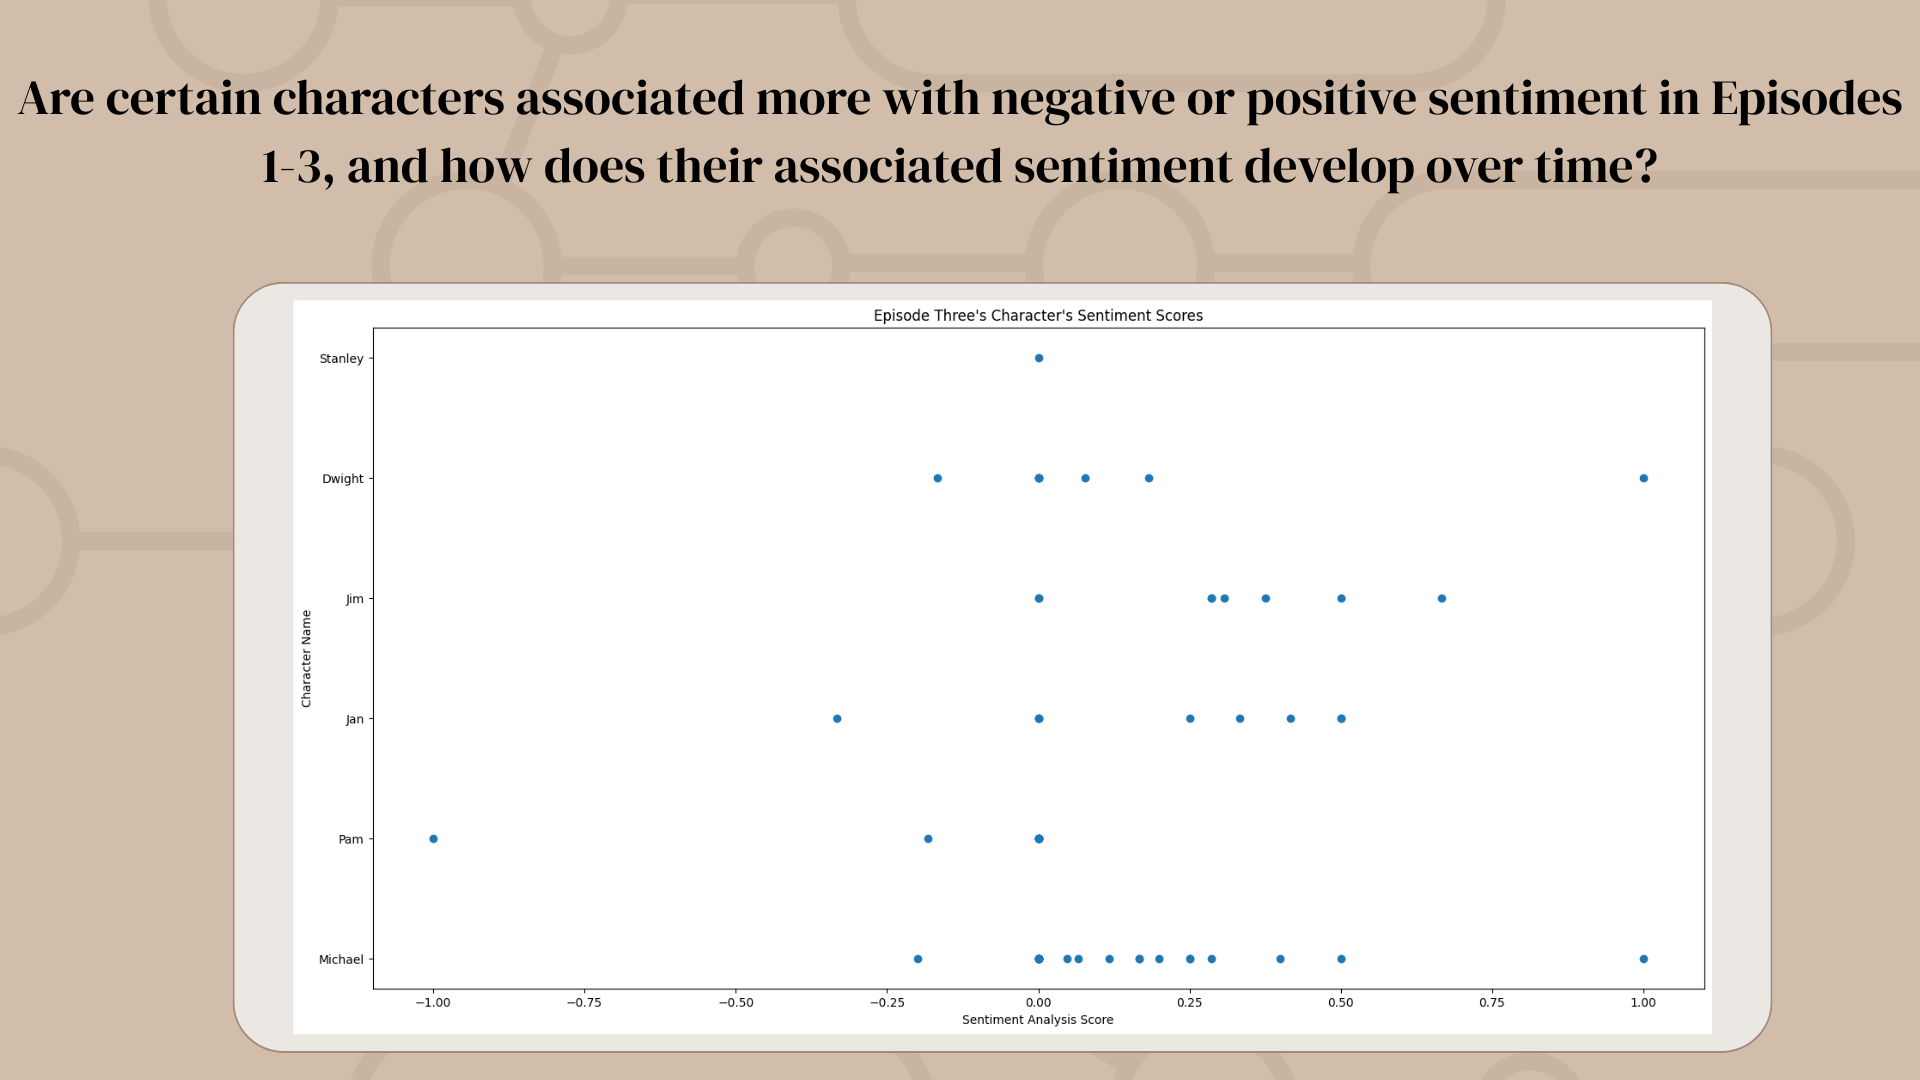

Notes from talking with mentor:

3 sentiment analyses columns: what are the min and max values?
Google Colab: how to connect to T4 GPU runtime

In [ ]:

office_df.loc[office_df['sentimentAnalysis_score'].isnull(), 'sentimentAnalysis_score'] = 'non-null value'
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  55130 non-null  object 
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

In [3]:
#statistical analysis


#Subsetting the data:
#group 1- subset1= episode1 subset2=episode2
#group 2-subset3=episode2 subset4=episode3

#using the change in episode 1 to episode 2 to determine the p value:
sentiment_median = office_df['sentimentAnalysis_score'].median()
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(sentiment_median)
office_df['sentimentAnalysis_score'] = pd.to_numeric(office_df['sentimentAnalysis_score'], errors='coerce')



#episode_1 = office_df[office_df['sentimentAnalysis_score'].iloc[:60]]
#episode_2 = office_df[office_df['sentimentAnalysis_score'].iloc[229:493]]
#episode_1 = office_df[office_df['character'] == "episode_1"]['sentimentAnalysis_score'].iloc[:60]
#episode_2 = office_df[office_df['character'] == "episode_2"]['sentimentAnalysis_score'].iloc[229:290]
#t_stat, p_val = ttest_ind(episode_1, episode_2)
#print(t_stat, p_val)

#using the change in episode 2 to episode 3 in order to determine the p value:
#episode_3 = office_df[office_df['sentimentAnalysis_score'].iloc[432:493]]
#t_stat, p_val = ttest_ind(episode_2, episode_3)
#print(t_stat, p_val)


office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  55130 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

In [21]:
#null hypothesis for each character: there is no difference between the characters' sentiment analysis scores between episodes 1 and

#the stats between episodes 1 and 2:
#t_stat, p_val = ttest_ind(office_df['sentimentAnalysis_score'].iloc[:60], office_df['sentimentAnalysis_score'].iloc[229:290])
episode1_df = office_df.iloc[:60]
episode2_df = office_df.iloc[229:290]

#episode1_df.head()
episode2_df.head()


#print(t_stat, p_val)


,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
229,230,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Michael,"Hey, uh, can I help you out in here?","Hey, uh, can I help you out in here?",8.3,3566,2005-03-29,0.333333,0.000000,0.00
230,231,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Mr. Brown,"Oh, I'm all set, thanks.","Oh, I'm all set, thanks.",8.3,3566,2005-03-29,0.500000,0.000000,0.60
231,232,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Michael,Gotcha. Good. I'd go with the rows. That's a g...,Gotcha. Good. I'd go with the rows. That's a g...,8.3,3566,2005-03-29,0.333333,0.000000,0.75
232,233,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Michael,Today is diversity day and someone's going to ...,Today is diversity day and someone's going to ...,8.3,3566,2005-03-29,0.071429,0.000000,1.15
233,234,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Jim,That's the thing. It's very sturdy paper and o...,That's the thing. It's very sturdy paper and o...,8.3,3566,2005-03-29,-0.038462,0.212132,-0.40


In [35]:
character1 = episode1_df['character']
character2 = episode2_df['character']

characters = set(character1).intersection(set(character2))
results = []

for character in characters:
  episode1_scores = episode1_df[episode1_df['character'] == character]['sentimentAnalysis_score'].dropna().tolist()
  episode2_scores = episode2_df[episode2_df['character'] == character]['sentimentAnalysis_score'].dropna().tolist()
  t_stat, p_val = ttest_ind(episode1_scores, episode2_scores)
  results.append((character, p_val, t_stat))
  #print(character)
  #print(episode1_scores)
  #print(episode2_scores)

print(results)

#ep1_counts = episode1_df['character'].value_counts()
#p2_counts = episode2_df['character'].value_counts()
#print(ep1_counts)
#rint(ep2_counts)



[('Dwight', np.float64(0.8188615402098389), np.float64(-0.2358062543385398)), ('Michael', np.float64(0.3904134964224337), np.float64(-0.8668772664249631)), ('Pam', np.float64(0.8466714269063886), np.float64(-0.201893213271812)), ('Jim', np.float64(0.6421200456811365), np.float64(-0.4742952627396382))]


NameError: name 'x' is not defined

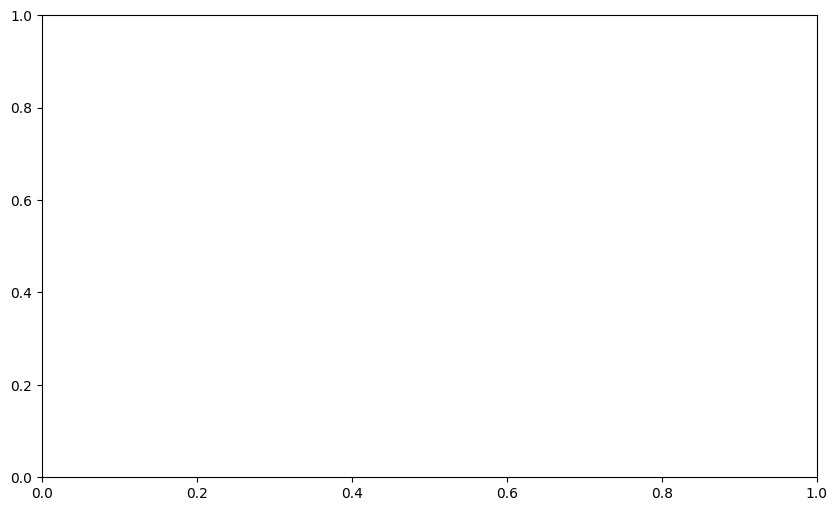

In [10]:
#ML model: KNN

features = office_df['character', 'sentimentAnalysis_score']
feature_1_name = 'Characters'
feature_2_name = 'Sentiment Analysis Scores'


fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(office_df['character']).min() - 0.1, office_df['character'].max() + 0.1, 0.01), np.arange(office_df['sentimentAnalysis_score'].min() - 0.1, office_df['sentimentAnalysis_score'].max() + 0.1, 0.01)

means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in office_df.groupby('Sentiment Score'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

In [15]:
office_df.head(230)

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,Great. Let me just...,Great. Let me just...,7.6,3706,2005-03-24,0.666667,0.000000,0.50
226,227,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, Roy.","[Car horn honking] Oh, Roy.",7.6,3706,2005-03-24,0.000000,0.000000,0.00
227,228,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,"Yeah. Listen, have a nice weekend.","Yeah. Listen, have a nice weekend.",7.6,3706,2005-03-24,0.250000,0.000000,0.50
228,229,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Yeah, definitely. You too. Enjoy it. You know ...","Yeah, definitely. You too. Enjoy it. [looks at...",7.6,3706,2005-03-24,0.500000,-0.163299,0.75
